In [157]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from pathlib import Path
import itertools

from comsolmllinux import vel_estim
from comsolmllinux.noise import make_noise
from comsolmllinux.custom_fk import make_fk

In [158]:
ds = np.arange(5.0, 7.5, 0.1)

In [159]:
ds

array([5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2,
       6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4])

In [160]:
d = 6.1

In [161]:
str(d)

'6.1'

In [162]:
steel = vel_estim.make_lamb_curves(E=205e9, p=7850, v=0.28)


Calculating symmetric modes..

0/100 - 0.0 kHz × mm
1/100 - 101.0 kHz × mm


C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:227: RuntimeWarning: invalid value encountered in double_scalars
  k = omega/vp
C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:229: RuntimeWarning: invalid value encountered in sqrt
  p = np.sqrt((omega/self.c_L)**2 - k**2, dtype=np.complex128)
C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:230: RuntimeWarning: invalid value encountered in sqrt
  q = np.sqrt((omega/self.c_S)**2 - k**2, dtype=np.complex128)
C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:256: RuntimeWarning: invalid value encountered in cdouble_scalars
  symmetric = (np.tan(q*self.h)/q
C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:257: RuntimeWarning: invalid value encountered in cdouble_scalars
  + (4*(k**2)*p*np.tan(p*self.h))/(q**2 - k**2)**2)
C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\

2/100 - 202.0 kHz × mm
3/100 - 303.0 kHz × mm
4/100 - 404.0 kHz × mm
5/100 - 505.1 kHz × mm
6/100 - 606.1 kHz × mm
7/100 - 707.1 kHz × mm
8/100 - 808.1 kHz × mm
9/100 - 909.1 kHz × mm
10/100 - 1010.1 kHz × mm
11/100 - 1111.1 kHz × mm
12/100 - 1212.1 kHz × mm
13/100 - 1313.1 kHz × mm
14/100 - 1414.1 kHz × mm
15/100 - 1515.2 kHz × mm
16/100 - 1616.2 kHz × mm
17/100 - 1717.2 kHz × mm
18/100 - 1818.2 kHz × mm
19/100 - 1919.2 kHz × mm
20/100 - 2020.2 kHz × mm
21/100 - 2121.2 kHz × mm
22/100 - 2222.2 kHz × mm
23/100 - 2323.2 kHz × mm
24/100 - 2424.2 kHz × mm
25/100 - 2525.3 kHz × mm
26/100 - 2626.3 kHz × mm
27/100 - 2727.3 kHz × mm
28/100 - 2828.3 kHz × mm
29/100 - 2929.3 kHz × mm
30/100 - 3030.3 kHz × mm
31/100 - 3131.3 kHz × mm
32/100 - 3232.3 kHz × mm
33/100 - 3333.3 kHz × mm
34/100 - 3434.3 kHz × mm
35/100 - 3535.4 kHz × mm
36/100 - 3636.4 kHz × mm
37/100 - 3737.4 kHz × mm
38/100 - 3838.4 kHz × mm
39/100 - 3939.4 kHz × mm
40/100 - 4040.4 kHz × mm
41/100 - 4141.4 kHz × mm
42/100 - 4242.4 

C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:284: RuntimeWarning: invalid value encountered in cdouble_scalars
  + (((q**2 - k**2)**2)*np.tan(p*self.h))/(4*(k**2)*p))
C:\Users\Magnus\PycharmProjects\PhD\Comsol_ML_linux\comsolmllinux\lamb\lamb.py:283: RuntimeWarning: invalid value encountered in cdouble_scalars
  antisymmetric = (q * np.tan(q*self.h)


14/100 - 1414.1 kHz × mm
15/100 - 1515.2 kHz × mm
16/100 - 1616.2 kHz × mm
17/100 - 1717.2 kHz × mm
18/100 - 1818.2 kHz × mm
19/100 - 1919.2 kHz × mm
20/100 - 2020.2 kHz × mm
21/100 - 2121.2 kHz × mm
22/100 - 2222.2 kHz × mm
23/100 - 2323.2 kHz × mm
24/100 - 2424.2 kHz × mm
25/100 - 2525.3 kHz × mm
26/100 - 2626.3 kHz × mm
27/100 - 2727.3 kHz × mm
28/100 - 2828.3 kHz × mm
29/100 - 2929.3 kHz × mm
30/100 - 3030.3 kHz × mm
31/100 - 3131.3 kHz × mm
32/100 - 3232.3 kHz × mm
33/100 - 3333.3 kHz × mm
34/100 - 3434.3 kHz × mm
35/100 - 3535.4 kHz × mm
36/100 - 3636.4 kHz × mm
37/100 - 3737.4 kHz × mm
38/100 - 3838.4 kHz × mm
39/100 - 3939.4 kHz × mm
40/100 - 4040.4 kHz × mm
41/100 - 4141.4 kHz × mm
42/100 - 4242.4 kHz × mm
43/100 - 4343.4 kHz × mm
44/100 - 4444.4 kHz × mm
45/100 - 4545.5 kHz × mm
46/100 - 4646.5 kHz × mm
47/100 - 4747.5 kHz × mm
48/100 - 4848.5 kHz × mm
49/100 - 4949.5 kHz × mm
50/100 - 5050.5 kHz × mm
51/100 - 5151.5 kHz × mm
52/100 - 5252.5 kHz × mm
53/100 - 5353.5 kHz × mm


(<Figure size 504x288 with 1 Axes>,
 <AxesSubplot:xlabel='Frequency × thickness [KHz × mm]', ylabel='Phase Velocity [m/s]'>)

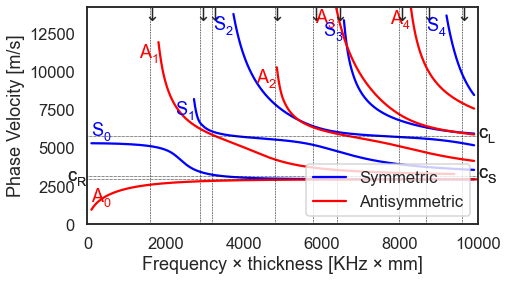

In [163]:
steel.plot_phase_velocity()

In [164]:
f = np.arange(25, 150, 2.5)*1000
disp_curves = {}
for d in ds:
    disp_curves[round(d, 3)] = 1/np.divide(steel.vp_antisym['A0'](f/1000*d), f)

In [165]:
disp_curves.keys()

dict_keys([5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4])

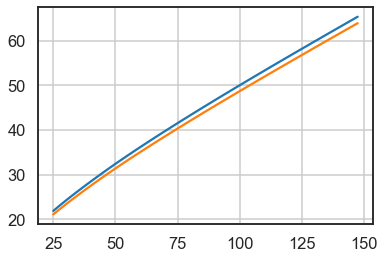

In [166]:
plt.figure()
plt.plot(f/1000, disp_curves[6.0])
plt.plot(f/1000, disp_curves[6.5])
plt.grid()
plt.show()

In [167]:
dx = 3456*0.2e-3/72 # For clock positions
kNyq = 1/dx/2

In [168]:
kNyq

52.08333333333333

In [169]:
def do_aliasing(curve, kNyq):
    aliased = True
    while aliased:
        curve = np.where(curve < kNyq, curve, curve - 2*kNyq)
        curve = np.where(curve > -kNyq, curve, curve + 2*kNyq)
        if (np.max(curve) < kNyq) & (np.min(curve) > -kNyq):
            aliased = False
    return curve

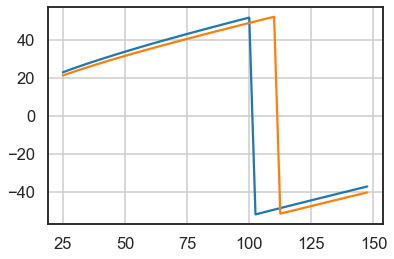

In [170]:
plt.figure()
plt.plot(f/1000, do_aliasing(disp_curves[5.5], kNyq))
plt.plot(f/1000, do_aliasing(disp_curves[6.5], kNyq))
plt.grid()
plt.show()

In [171]:
mat = scipy.io.loadmat(Path().joinpath('..', 'data', 'input_synth', 'input_synth_ideal', 'concat_traces_ideal.mat'))

In [172]:
timesamples = 400
noisedb = -3
dt = 1e-6

In [173]:
X = mat['concat_traces'].astype('float32')
X = np.swapaxes(X, 2, 1)
X.dtype, X.shape

(dtype('float32'), (21, 73, 401))

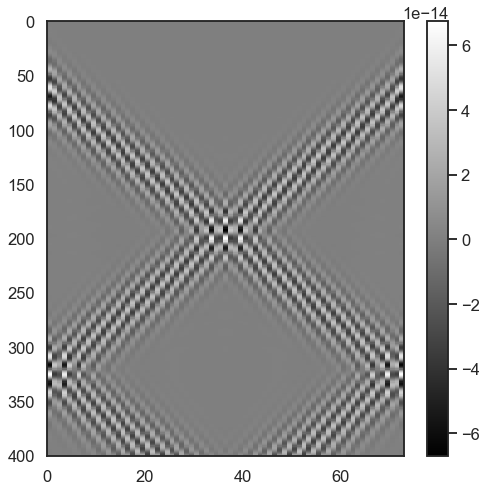

In [174]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(8,8))

plt.pcolormesh(X[0,:,:].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()


plt.show()

In [175]:
X_sample_c = X[:,:,:timesamples]/X.max()
X_sample_n = X_sample_c + make_noise(noisedb, X_sample_c.shape)

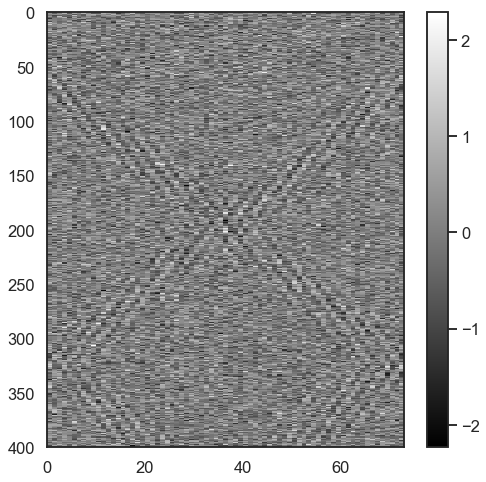

In [176]:
sns.set_style('white')
sns.set_context('talk')
plt.figure(figsize=(8,8))

plt.pcolormesh(X_sample_n[0,:,:].T, cmap='gray')
plt.gca().invert_yaxis()
plt.colorbar()


plt.show()

In [177]:
decim = 1
dx = 3456*0.2e-3/72*decim # For clock positions
fk_c, k_array, f_array = make_fk(X_sample_c[0, ::decim, :].T, dt, dx)
fk_n, k_array, f_array = make_fk(X_sample_n[0, ::decim, :].T, dt, dx)

kNyq = 1/dx/2

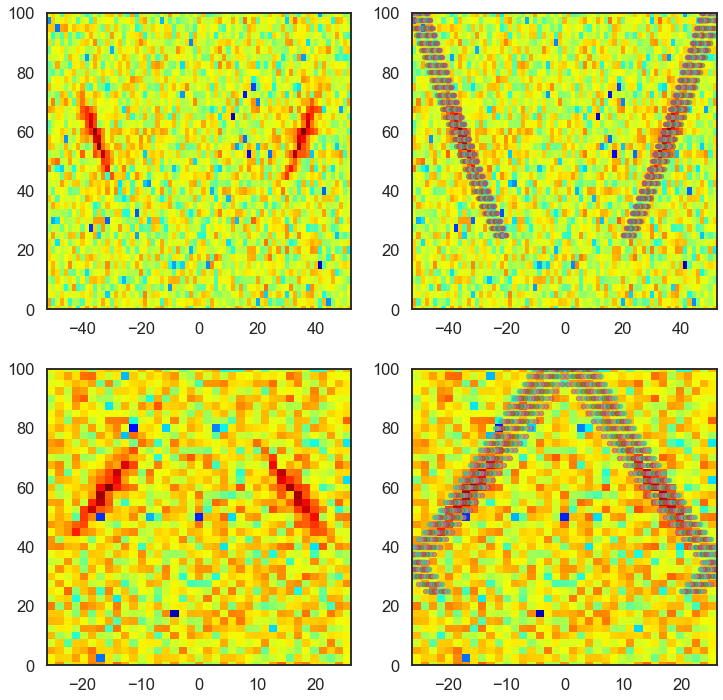

In [178]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']
color_iter = itertools.cycle(colors)
plt.figure(figsize=(12, 12))

decim = 1
dx = 3456*0.2e-3/72*decim # For clock positions
fk_c, k_array, f_array = make_fk(X_sample_c[0, ::decim, :].T, dt, dx)
fk_n, k_array, f_array = make_fk(X_sample_n[0, ::decim, :].T, dt, dx)

kNyq = 1/dx/2


plt.subplot(2,2,1)
plt.pcolormesh(k_array, f_array / 1000, np.log(np.abs(fk_n) / (np.max(np.abs(fk_n)))), cmap='jet')
plt.ylim(0,100)
plt.subplot(2,2,2)
plt.pcolormesh(k_array, f_array / 1000, np.log(np.abs(fk_n) / (np.max(np.abs(fk_n)))), cmap='jet')
for curve in disp_curves:
    color = next(color_iter)
    plt.plot(do_aliasing(disp_curves[curve], kNyq), f/1000, ".", alpha=0.5, color=color)
    plt.plot(do_aliasing(-disp_curves[curve], kNyq), f/1000, ".", alpha=0.5, color=color)
plt.ylim(0,100)

plt.subplot(2,2,3)
decim = 2
dx = 3456*0.2e-3/72*decim # For clock positions
fk_c, k_array, f_array = make_fk(X_sample_c[0, ::decim, :].T, dt, dx)
fk_n, k_array, f_array = make_fk(X_sample_n[0, ::decim, :].T, dt, dx)

kNyq = 1/dx/2
plt.pcolormesh(k_array, f_array / 1000, np.log(np.abs(fk_n) / (np.max(np.abs(fk_n)))), cmap='jet')
plt.ylim(0,100)
plt.subplot(2,2,4)
plt.pcolormesh(k_array, f_array / 1000, np.log(np.abs(fk_n) / (np.max(np.abs(fk_n)))), cmap='jet')
for curve in disp_curves:
    color = next(color_iter)
    plt.plot(do_aliasing(disp_curves[curve], kNyq), f/1000, ".", alpha=0.5, color=color)
    plt.plot(do_aliasing(-disp_curves[curve], kNyq), f/1000, ".", alpha=0.5, color=color)
plt.ylim(0,100)

#plt.xlim(0,60)
#plt.colorbar()
plt.grid()
plt.show()

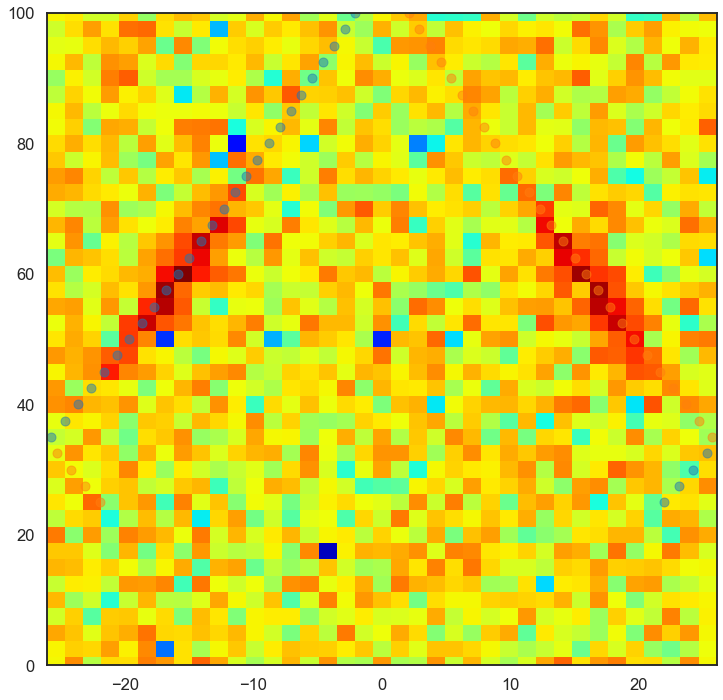

In [179]:
plt.figure(figsize=(12, 12))
plt.pcolormesh(k_array, f_array / 1000, np.log(np.abs(fk_n) / (np.max(np.abs(fk_n)))), cmap='jet')
plt.plot(do_aliasing(disp_curves[6.0], kNyq), f/1000, "o", alpha=0.5)
plt.plot(do_aliasing(-disp_curves[6.0], kNyq), f/1000, "o", alpha=0.5)
plt.ylim(0,100)
#plt.colorbar()

plt.show()

In [180]:
decim = 6
dx = 3456*0.2e-3/72*decim # For clock positions
fk_c, k_array, f_array = make_fk(X_sample_c[5, ::decim, :].T, dt, dx)
fk_n, k_array, f_array = make_fk(X_sample_n[5, ::decim, :].T, dt, dx)

kNyq = 1/dx/2

In [181]:
kNyq

8.680555555555555

In [182]:
testfreq = 50000
index_fk = np.where(f_array == testfreq)[0]
index_fk

array([220], dtype=int64)

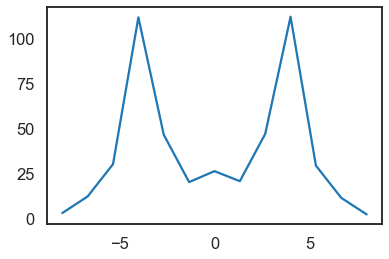

In [183]:
plt.figure()
plt.plot(k_array, np.abs(fk_c[index_fk, :].T))
plt.show()

In [184]:
index_disp = np.where(f==testfreq)
index_disp

(array([10], dtype=int64),)

In [185]:
disp_curves[6.0]

array([21.91373512, 23.08195165, 24.21036905, 25.3071801 , 26.37841574,
       27.4284552 , 28.46038283, 29.47624242, 30.47722217, 31.46379183,
       32.43580682, 33.39285223, 34.33602746, 35.26699553, 36.18716381,
       37.09771327, 37.99962588, 38.89370741, 39.7806334 , 40.66102893,
       41.53541378, 42.40419568, 43.2676799 , 44.12607746, 44.97951477,
       45.82819499, 46.67249974, 47.51277498, 48.34931394, 49.18236079,
       50.01211368, 50.83873229, 51.66240739, 52.48334986, 53.30173978,
       54.11772667, 54.9314311 , 55.74294608, 56.55235086, 57.35977656,
       58.16536199, 58.96922645, 59.77147052, 60.57217688, 61.37141097,
       62.1692381 , 62.96575334, 63.7610459 , 64.55519203, 65.34825553])

In [186]:
disp_curves[6.0][index_disp]

array([32.43580682])

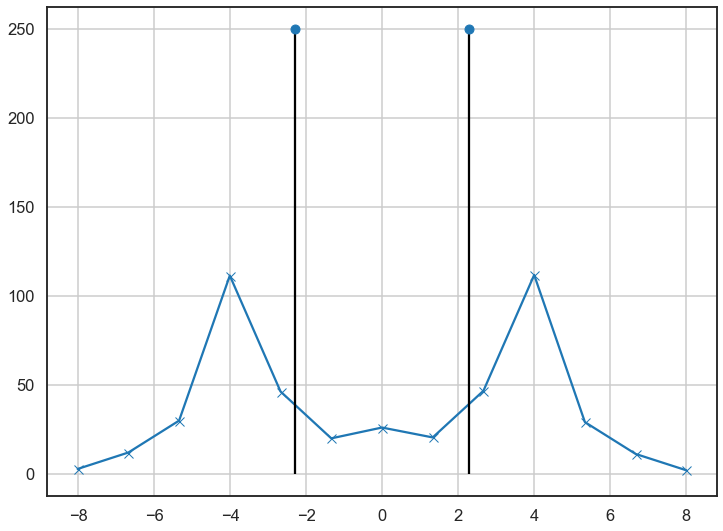

In [187]:
plt.figure(figsize=(12, 9))
plt.plot(k_array, np.abs(fk_c[index_fk, :].T), 'x-')
plt.stem(do_aliasing(disp_curves[6.0], kNyq)[index_disp], 250, 'k')
plt.stem(do_aliasing(-disp_curves[6.0], kNyq)[index_disp], 250, 'k')
#plt.stem(disp_curves['6.0 mm'][index_disp], 50, 'r')
plt.grid()
#plt.xlim(10, 25)

plt.show()

In [188]:
interpolator2d = scipy.interpolate.RectBivariateSpline(f_array, k_array, np.abs(fk_n))
#interpolator2d = scipy.interpolate.interp2d(f_array, k_array, np.abs(fk_c).T)

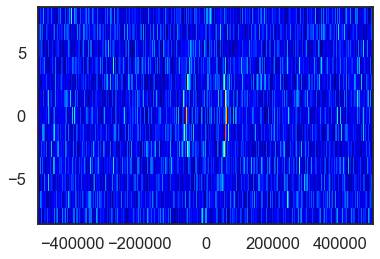

In [189]:
plt.figure()
plt.pcolormesh(f_array, k_array, interpolator2d(f_array, k_array).T, cmap='jet')
plt.show()

In [190]:
f[1]

27500.0

In [191]:
curves_sum = {}
for curve in disp_curves:
    curves_sum[curve] = 0
    for i in range(len(f)):
        curves_sum[curve] += interpolator2d(f[i], do_aliasing(disp_curves[curve], kNyq)[i])[0][0]
        curves_sum[curve] += interpolator2d(f[i], do_aliasing(-disp_curves[curve], kNyq)[i])[0][0]

In [192]:
#df_curves_sum = pd.DataFrame.from_dict(curves_sum, orient='index')

In [193]:
#df_curves_sum.idxmax()

In [194]:
max(curves_sum, key=curves_sum.get)

7.0

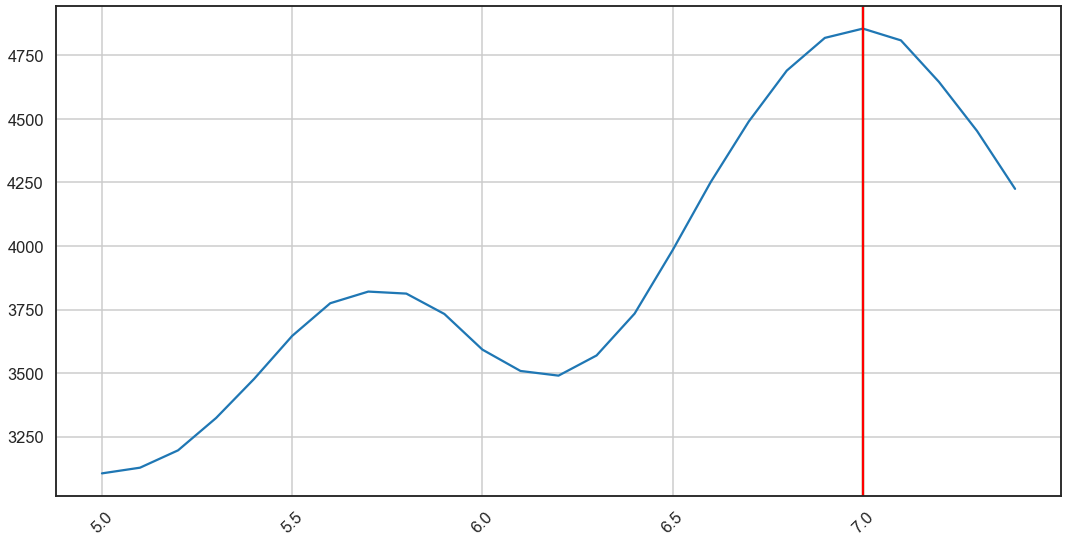

In [211]:
plt.figure(figsize=(18,9))
#sns.lineplot(data=df_curves_sum)
plt.plot(curves_sum.keys(), curves_sum.values())
plt.axvline(x=max(curves_sum, key=curves_sum.get), color='g')
plt.axvline(x=7.0, color='r')
plt.grid(visible=True, which='major')
plt.grid(visible=True, which='minor')
plt.minorticks_on()
plt.xticks(ticks=ds[::5], rotation=45)
#plt.set_xticks(ds, minor=True)
plt.show()

In [196]:
labels = pd.read_csv(Path().joinpath('..', 'data', 'input_synth', 'input_synth_ideal', 'labels_ideal.csv'))

In [197]:
labels.rename(columns={'thickness':'Thickness',
                       'depression':'Depression depth',
                       'pitting':'Pitting depth',
                       'depression_mu':'Depression location',
                       'depression_sigma':'Depression width',
                       'thickness_max':'Thickness maximum',
                       'thickness_min':'Thickness minimum',
                       'thickness_mean':'Thickness mean',
                       'thickness_median':'Thickness median',
                       'thickness_std':'Thickness std',
                       'model_rough_coeff':'Roughness',
                       'num_pits':'Number of pits'}, inplace=True)

In [198]:
labels

,modelname,Thickness,seed,Depression depth,Pitting depth,Depression location,Depression width,Thickness maximum,Thickness minimum,Thickness mean,Thickness median,Thickness std,thickness_var,Roughness,Number of pits
0,model_c3456_t030_d000_p000_r1000_s000,6.0,0,0,0,316.922805,67.625959,6.0,6.0,6.0,6.0,0,0,1,0
1,model_c3456_t031_d000_p000_r1000_s000,6.2,0,0,0,316.922805,67.625959,6.2,6.2,6.2,6.2,0,0,1,0
2,model_c3456_t032_d000_p000_r1000_s000,6.4,0,0,0,316.922805,67.625959,6.4,6.4,6.4,6.4,0,0,1,0
3,model_c3456_t033_d000_p000_r1000_s000,6.6,0,0,0,316.922805,67.625959,6.6,6.6,6.6,6.6,0,0,1,0
4,model_c3456_t034_d000_p000_r1000_s000,6.8,0,0,0,316.922805,67.625959,6.8,6.8,6.8,6.8,0,0,1,0
5,model_c3456_t035_d000_p000_r1000_s000,7.0,0,0,0,316.922805,67.625959,7.0,7.0,7.0,7.0,0,0,1,0
6,model_c3456_t036_d000_p000_r1000_s000,7.2,0,0,0,316.922805,67.625959,7.2,7.2,7.2,7.2,0,0,1,0
7,model_c3456_t037_d000_p000_r1000_s000,7.4,0,0,0,316.922805,67.625959,7.4,7.4,7.4,7.4,0,0,1,0
8,model_c3456_t038_d000_p000_r1000_s000,7.6,0,0,0,316.922805,67.625959,7.6,7.6,7.6,7.6,0,0,1,0
9,model_c3456_t039_d000_p000_r1000_s000,7.8,0,0,0,316.922805,67.625959,7.8,7.8,7.8,7.8,0,0,1,0


In [199]:
f_array[np.where(f_array>25000):np.where(f_array<150000)]

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
f_array[np.where(f_array >= 25e3 and f_array <= 150e3)]

In [ ]:
a = f_array >=25e3
b = f_array <=150e3
(a & b).any()

In [ ]:
temp = f_array[f_array >= 25e3]
temp = temp[temp <= 150e3]

In [ ]:
temp